<a href="https://colab.research.google.com/github/NandoV179/SystemEstimateSpeedOfVehicles/blob/main/NeuralNetworkEstimateSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
#secuencia="40204"    ##40204   0.91 on validation data): 1.89
data = pd.read_csv('Folder_1_al_5_y_Folder_7_al_10_rcnn.txt', header=0, sep=',')
data1 = pd.read_csv('velocidad_RCNN_40204.txt', header=0, sep=',')
data = data.reindex(np.random.permutation(data.index))
data1 = data1.reindex(np.random.permutation(data1.index))
print(data)
print(data1)

TensorFlow 1.x selected.
         dx   dy   dw   dh  Velocidad
196394  0.0  1.6 12.7  1.8        4.8
113403 -0.9 -2.1  0.3  0.9        1.2
255664 -0.4 -0.7 -1.2  0.9        1.7
212803  0.0 -0.9 -2.1 -1.3        0.8
210124 -3.3  0.3 -2.9 -4.1        4.9
...     ...  ...  ...  ...        ...
150798  0.4  0.0  0.4  0.1        0.3
181236  0.2 -3.1 -3.5  1.5        2.5
275348 -3.7 -0.0 -1.5  0.5        4.5
290896 -2.0  2.3  1.9 -0.2        2.0
56102  -1.6  2.3 -0.5 -2.3        3.9

[294028 rows x 5 columns]
       dx   dy   dw   dh  Velocidad
3455  4.8  5.0  6.2  1.5        9.7
9283 -0.9  3.7  4.5  1.2        9.1
622   3.3  1.8  0.2 -1.7        1.3
311  -5.5  0.4  2.6 -1.0        3.2
5548  1.3 -0.0  0.5  0.7        1.9
...   ...  ...  ...  ...        ...
602   6.3  2.7  4.2  2.4        6.7
3055  1.9  2.0  0.7 -1.1        2.2
3602  0.9 -0.9  3.3 -0.0        1.9
6883  2.8  1.5  2.5  0.8        4.2
2311  1.7 -8.3 -5.4  1.5        6.2

[10768 rows x 5 columns]


In [ ]:
def preprocess_targets(data):

  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["Velocidad"] = (data["Velocidad"])
  return output_targets

In [ ]:
def preprocess_targets1(data1):

  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["Velocidad"] = (data1["Velocidad"])
  return output_targets

In [ ]:
# prepocesamiento de los datos
def preprocess_features (data):
    
    selected_feature=data[[
        "dx",
        "dy",
        'dw',
        "dh",
        ]]  #selecionamos las columnas que van a ingresar a la capa de entrada de la red
    processed_feauture=selected_feature.copy()
    return processed_feauture

In [ ]:
# prepocesamiento de los datos
def preprocess_features1 (data1):
    
    selected_feature=data1[[
        "dx",
        "dy",
        'dw',
        "dh",
        ]]  #selecionamos las columnas que van a ingresar a la capa de entrada de la red
    processed_feauture=selected_feature.copy()
    return processed_feauture

In [ ]:
training_examples = preprocess_features(data.head(294028))
training_targets = preprocess_targets(data.head(294028))
#validation_examples = preprocess_features(data.tail(5079))
#validation_targets = preprocess_targets(data.tail(5079))

validation_examples = preprocess_features1(data1.head(10768))
validation_targets = preprocess_targets1(data1.head(10768))

print("training examples")
print(training_examples)

print("training targets")
print(training_targets)

print("validation examples")
print(validation_examples)

print("validation targets")
print(validation_targets)

training examples
         dx   dy   dw   dh
196394  0.0  1.6 12.7  1.8
113403 -0.9 -2.1  0.3  0.9
255664 -0.4 -0.7 -1.2  0.9
212803  0.0 -0.9 -2.1 -1.3
210124 -3.3  0.3 -2.9 -4.1
...     ...  ...  ...  ...
150798  0.4  0.0  0.4  0.1
181236  0.2 -3.1 -3.5  1.5
275348 -3.7 -0.0 -1.5  0.5
290896 -2.0  2.3  1.9 -0.2
56102  -1.6  2.3 -0.5 -2.3

[294028 rows x 4 columns]
training targets
        Velocidad
196394        4.8
113403        1.2
255664        1.7
212803        0.8
210124        4.9
...           ...
150798        0.3
181236        2.5
275348        4.5
290896        2.0
56102         3.9

[294028 rows x 1 columns]
validation examples
       dx   dy   dw   dh
3455  4.8  5.0  6.2  1.5
9283 -0.9  3.7  4.5  1.2
622   3.3  1.8  0.2 -1.7
311  -5.5  0.4  2.6 -1.0
5548  1.3 -0.0  0.5  0.7
...   ...  ...  ...  ...
602   6.3  2.7  4.2  2.4
3055  1.9  2.0  0.7 -1.1
3602  0.9 -0.9  3.3 -0.0
6883  2.8  1.5  2.5  0.8
2311  1.7 -8.3 -5.4  1.5

[10768 rows x 4 columns]
validation targets
      

In [ ]:
def construct_feature_columns(input_features):
  
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [ ]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                             
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [ ]:
def train_nn_regression_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

  periods = 20
  steps_per_period = steps / periods
  
  # Create a DNNRegressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  dnn_regressor = tf.estimator.DNNRegressor(
      feature_columns=construct_feature_columns(training_examples),
      hidden_units=hidden_units,
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["Velocidad"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["Velocidad"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["Velocidad"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    dnn_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
  print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)
  print("validation prediction")
  print(validation_predictions)

  #save data to csv
  df=pd.DataFrame(validation_predictions)
  df.to_csv("validation_prediction_val__RCNN_40204.txt",header=True,index=False)
  
  df1=pd.DataFrame(validation_targets)
  df1.to_csv("validation_target_val_RCNN_40204.txt",header=True,index=False)
  
  print("validation targets")
  print(validation_targets)

  return dnn_regressor

Training model...
RMSE (on training data):
  period 00 : 3.58
  period 01 : 2.88
  period 02 : 3.03
  period 03 : 2.75
  period 04 : 2.95
  period 05 : 2.71
  period 06 : 2.77
  period 07 : 2.72
  period 08 : 2.99
  period 09 : 2.97
  period 10 : 2.83
  period 11 : 2.78
  period 12 : 2.81
  period 13 : 2.91
  period 14 : 2.95
  period 15 : 2.77
  period 16 : 2.89
  period 17 : 2.80
  period 18 : 2.69
  period 19 : 3.00
Model training finished.
Final RMSE (on training data):   3.00
Final RMSE (on validation data): 1.88
validation prediction
[9.690659  3.8991244 3.680953  ... 2.861202  4.918689  7.9975696]
validation targets
      Velocidad
3455        9.7
9283        9.1
622         1.3
311         3.2
5548        1.9
...         ...
602         6.7
3055        2.2
3602        1.9
6883        4.2
2311        6.2

[10768 rows x 1 columns]


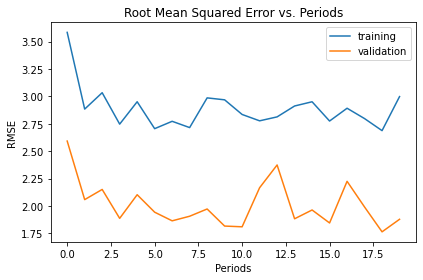

In [ ]:
dnn_regressor = train_nn_regression_model(
    learning_rate=0.02,
    steps=500,
    batch_size=10,
    hidden_units=[10, 3],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)